# EE7206 MACHINE LEARNING

# Project Report

NAME    : SANKALPA V.L.T.

REG NO. : EG/2015/2757

DATE    : 2019/09/19

## Q1 part 1 :- Identifing outlier trades based on Executed Price & Executed Qty using Hierarchical Clustering

In [2]:
# Importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Data preprocessing with pandas

In [3]:
# Importing the trades data as pandas DataFrame
dataset = pd.read_csv('Trades.csv')
# Filtering the trades of stock ES0158252033 and create a new DataFrame
Trades = dataset.loc[dataset.Stock=='ES0158252033', :]
# Add indexing column to Dataframe (Lets consider this index represent the Trade Date)
Trades['Index'] = range(1, len(Trades) + 1)
# Create NumPy array with Execute Qty and Execute Price of Trades
X = Trades.iloc[:, [ 1, 2]].values

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
dataset

,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID
0,01JUL2014:09:00:00,1,3.09,BE0160342011,10442101280,10442101281,B11293128,B11293128
1,01JUL2014:09:00:00,1,34.30,CH0008853209,10442101321,10442101322,A170820,A170820
2,01JUL2014:09:00:00,1,2.96,ES0109429037,10442101354,10442101355,B169653,B169653
3,01JUL2014:09:00:00,1,19.71,ES0158252033,10442111564,10442101372,A163878,B204480
4,01JUL2014:09:00:00,1,19.71,ES0158252033,10442101373,10442101368,A2007006,A163878
5,01JUL2014:09:00:00,2,19.71,ES0158252033,10442111564,10442101377,B133386,B204480
6,01JUL2014:09:00:00,6,19.71,ES0158252033,10442101375,10442101359,B128778,B128778
7,01JUL2014:09:00:00,12,19.71,ES0158252033,10442101383,10442101368,A2007006,C439398190
8,01JUL2014:09:00:00,18,19.71,ES0158252033,10442101367,10442101368,A2007006,C424759231
9,01JUL2014:09:00:00,44,19.71,ES0158252033,10442101375,10442101368,A2007006,B128778


In [5]:
Trades

,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID,Index
3,01JUL2014:09:00:00,1,19.71,ES0158252033,10442111564,10442101372,A163878,B204480,1
4,01JUL2014:09:00:00,1,19.71,ES0158252033,10442101373,10442101368,A2007006,A163878,2
5,01JUL2014:09:00:00,2,19.71,ES0158252033,10442111564,10442101377,B133386,B204480,3
6,01JUL2014:09:00:00,6,19.71,ES0158252033,10442101375,10442101359,B128778,B128778,4
7,01JUL2014:09:00:00,12,19.71,ES0158252033,10442101383,10442101368,A2007006,C439398190,5
8,01JUL2014:09:00:00,18,19.71,ES0158252033,10442101367,10442101368,A2007006,C424759231,6
9,01JUL2014:09:00:00,44,19.71,ES0158252033,10442101375,10442101368,A2007006,B128778,7
10,01JUL2014:09:00:00,75,19.71,ES0158252033,10442111564,10442101368,A2007006,B204480,8
11,01JUL2014:09:00:03,14,20.60,ES0158252033,10434416337,10442101363,C8329321,C11084986,9
12,01JUL2014:09:00:03,64,20.40,ES0158252033,10442101384,10427330904,C9324721,A8605026,10


In [6]:
X

array([[  1.  ,  19.71],
       [  1.  ,  19.71],
       [  2.  ,  19.71],
       ...,
       [200.  ,  10.71],
       [200.  ,  10.71],
       [179.  ,  10.71]])

### Using the dendrogram to find the optimal number of clusters suitable to identify outliners

When observing trade dataset it possible to come to following conclusions,
1.	Executed price doesn’t contribute to form an outlier trade since frequent rapid price changes not possible to observed in give dataset
2.	Executed quantity of trades is the only parameter that can case to form an outlier trade


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


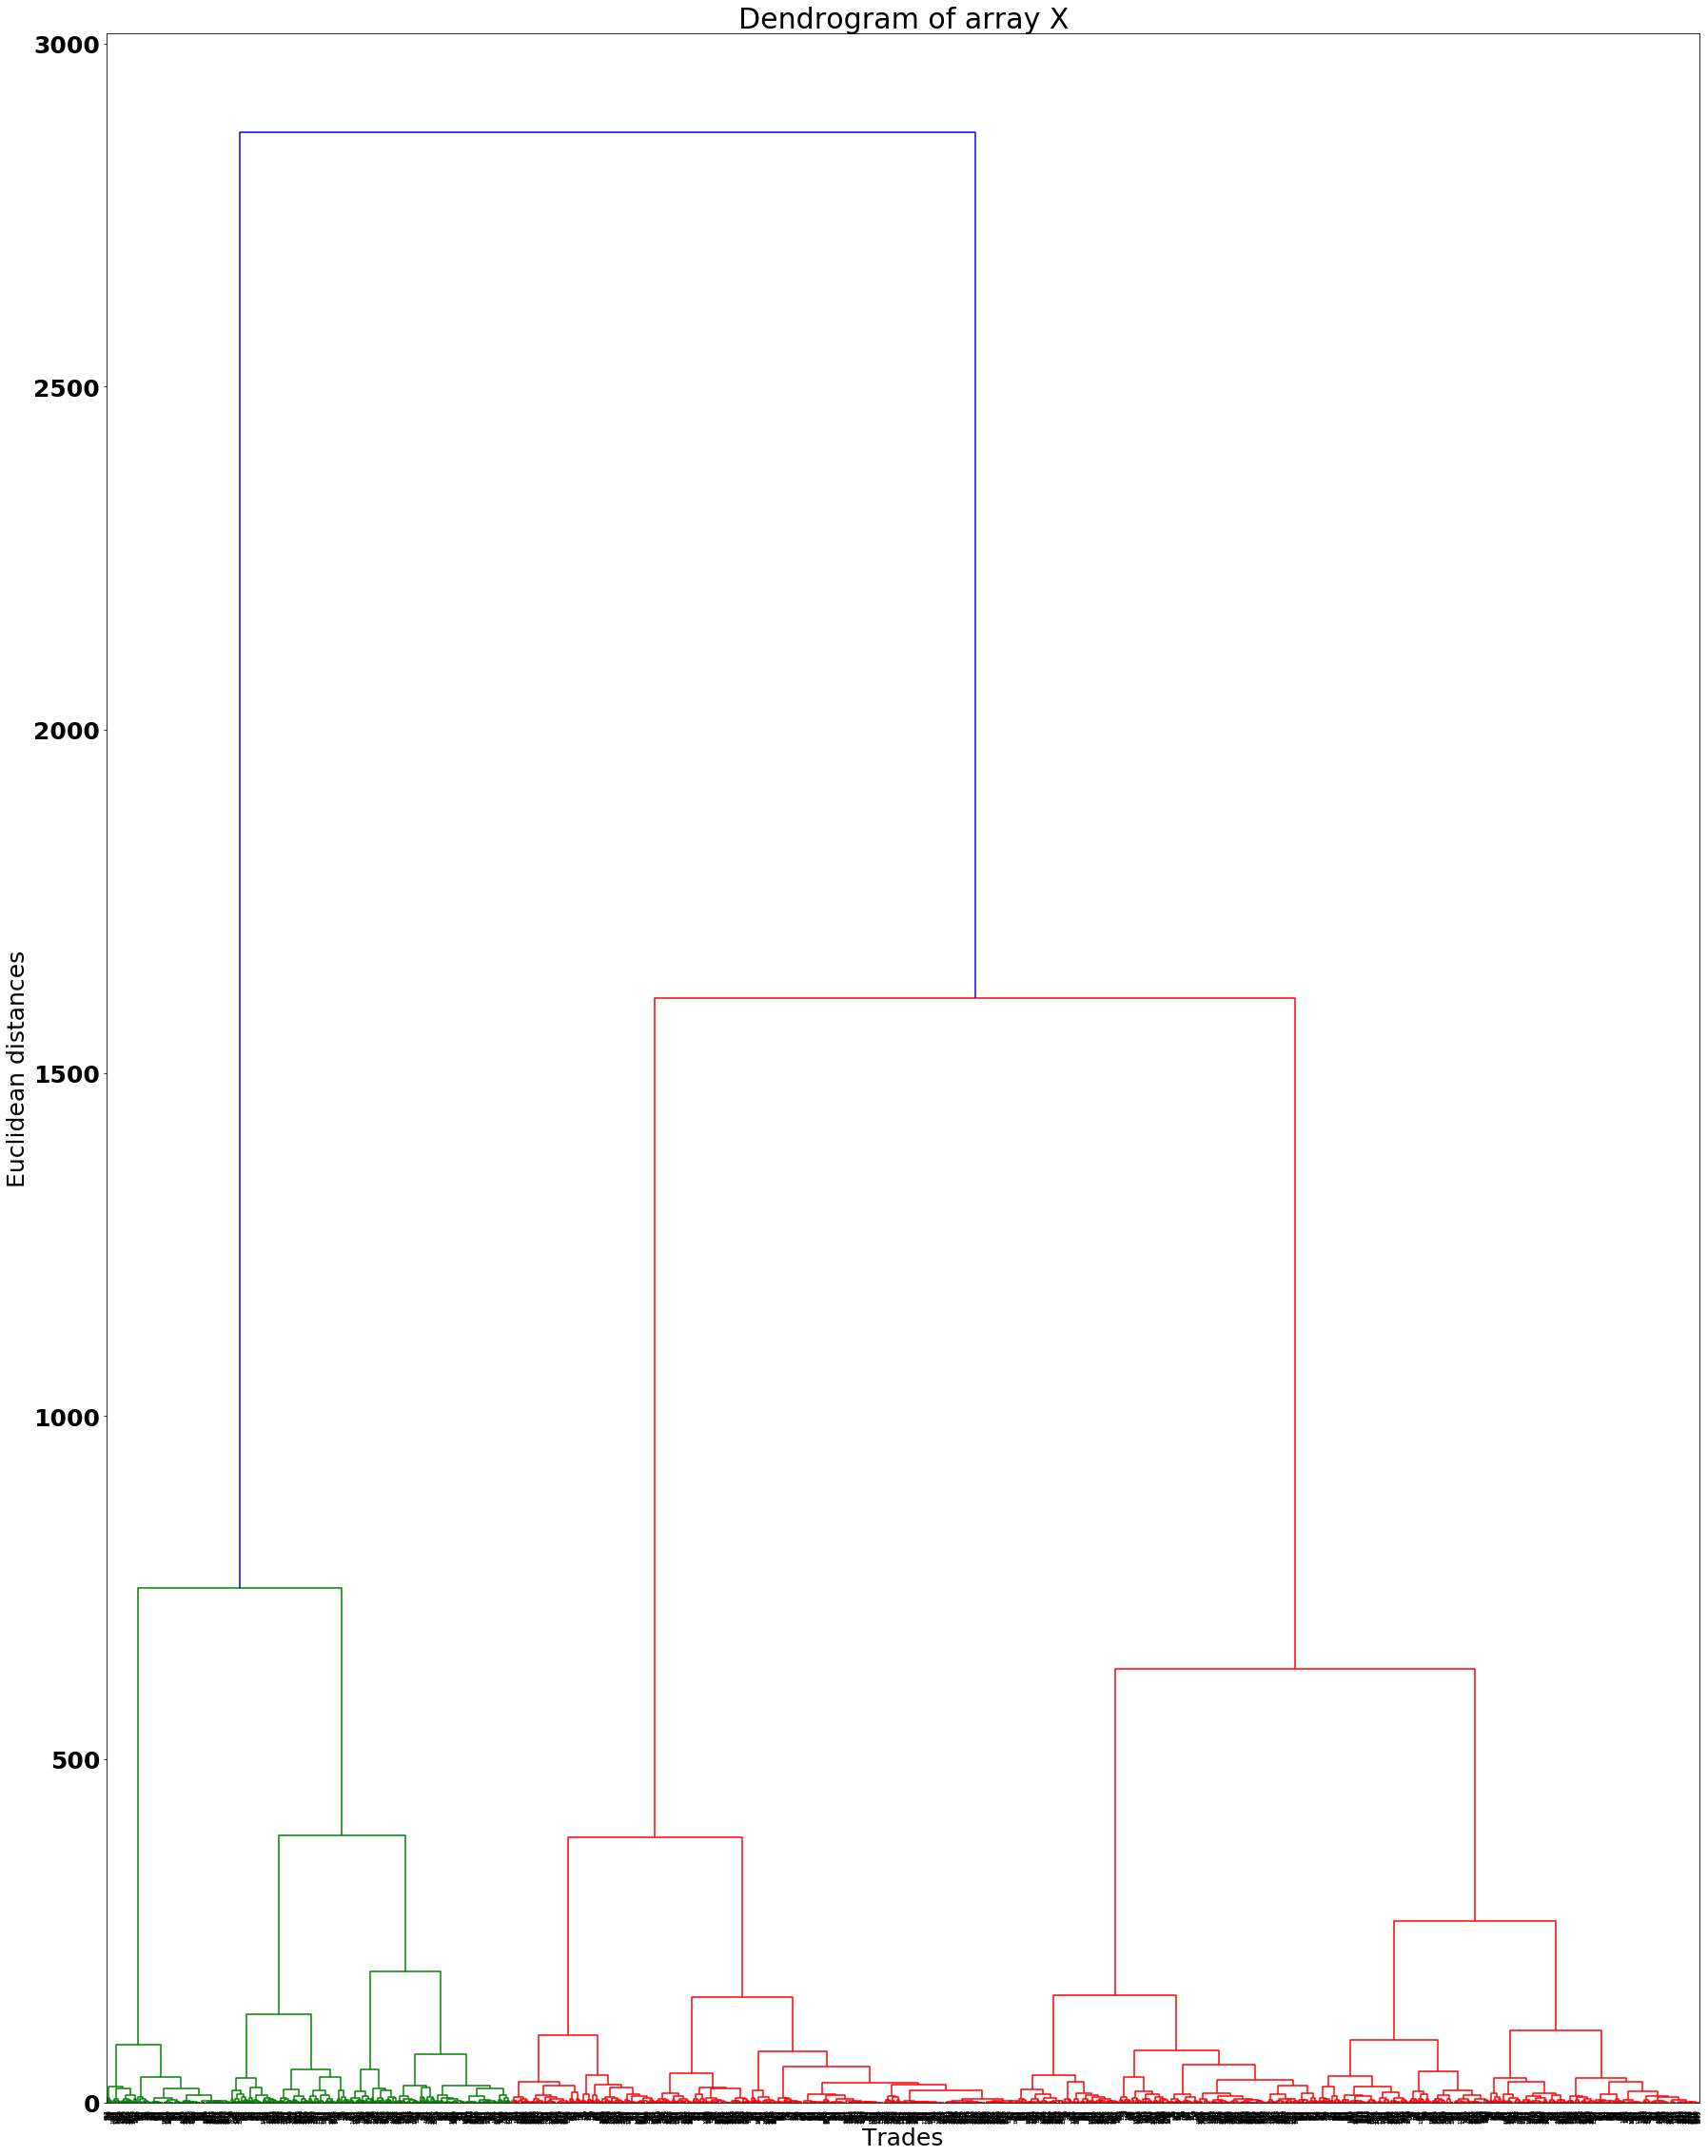

In [7]:
# change the font siXe on a matplotlib plot
font = {'family' : 'normal','weight' : 'bold','size'   : 25}
plt.rc('font', **font)
# change the graph siXe of a matplotlib plot
plt.rcParams['figure.figsize'] = (30, 40)

# plot dendrogram for X array
dendrogram_X = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram of array X')
plt.xlabel('Trades')
plt.ylabel('Euclidean distances')
plt.show()

## Apply Hierarchical Clustering

by drawing line across 500 euclidean distance it possible to determine the optimal number of clusters as five clusters

In [8]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
# Create Array with clusters
X_hc = hc.fit_predict(X)
# Add a X_hc array as Cluster column to a Trades dataframe
Trades['Cluster'] = X_hc

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
Trades

,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID,Index,Cluster
3,01JUL2014:09:00:00,1,19.71,ES0158252033,10442111564,10442101372,A163878,B204480,1,4
4,01JUL2014:09:00:00,1,19.71,ES0158252033,10442101373,10442101368,A2007006,A163878,2,4
5,01JUL2014:09:00:00,2,19.71,ES0158252033,10442111564,10442101377,B133386,B204480,3,4
6,01JUL2014:09:00:00,6,19.71,ES0158252033,10442101375,10442101359,B128778,B128778,4,4
7,01JUL2014:09:00:00,12,19.71,ES0158252033,10442101383,10442101368,A2007006,C439398190,5,4
8,01JUL2014:09:00:00,18,19.71,ES0158252033,10442101367,10442101368,A2007006,C424759231,6,4
9,01JUL2014:09:00:00,44,19.71,ES0158252033,10442101375,10442101368,A2007006,B128778,7,1
10,01JUL2014:09:00:00,75,19.71,ES0158252033,10442111564,10442101368,A2007006,B204480,8,2
11,01JUL2014:09:00:03,14,20.60,ES0158252033,10434416337,10442101363,C8329321,C11084986,9,4
12,01JUL2014:09:00:03,64,20.40,ES0158252033,10442101384,10427330904,C9324721,A8605026,10,2


## Visualising the clusters

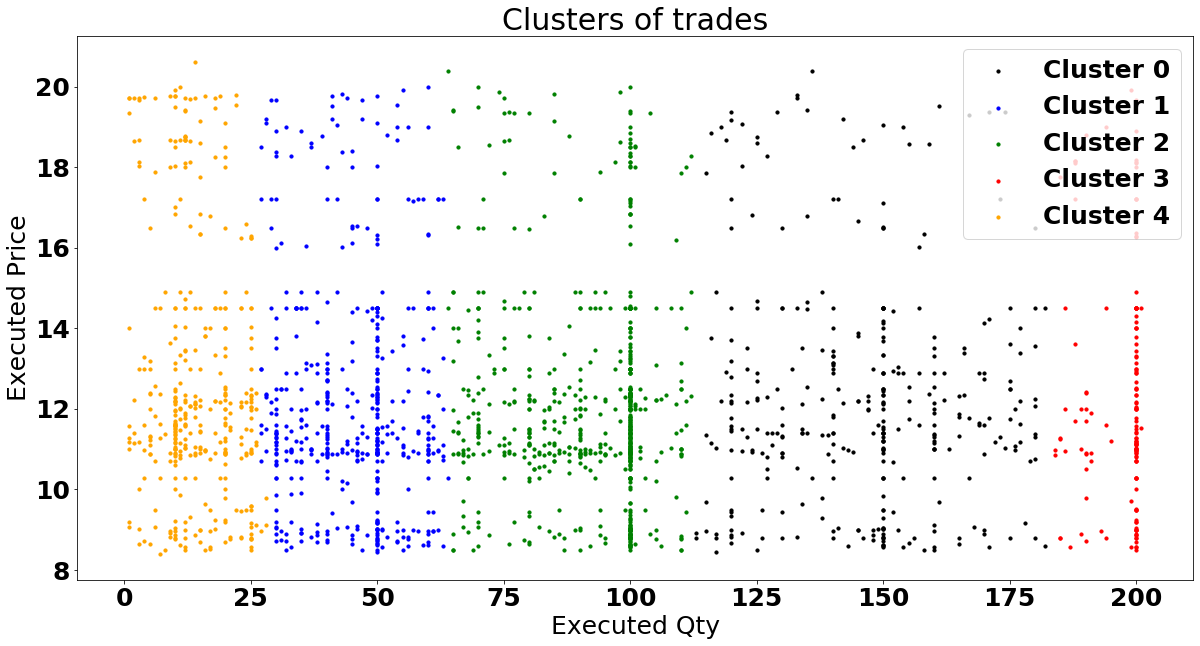

In [10]:
# change the graph size of a matplotlib plot
plt.rcParams['figure.figsize'] = (20, 10)
# Visualising the clusters
plt.scatter(X[X_hc == 0, 0], X[X_hc == 0, 1], s = 10, c = 'black', label = 'Cluster 0')
plt.scatter(X[X_hc == 1, 0], X[X_hc == 1, 1], s = 10, c = 'blue', label = 'Cluster 1')
plt.scatter(X[X_hc == 2, 0], X[X_hc == 2, 1], s = 10, c = 'green', label = 'Cluster 2')
plt.scatter(X[X_hc == 3, 0], X[X_hc == 3, 1], s = 10, c = 'red', label = 'Cluster 3')
plt.scatter(X[X_hc == 4, 0], X[X_hc == 4, 1], s = 10, c = 'orange', label = 'Cluster 4')
plt.title('Clusters of trades')
plt.xlabel('Executed Qty')
plt.ylabel('Executed Price')
plt.legend()
plt.show()

## Calculating statistical information of clusters
Use group by pandas aggregate to calculate statistical information of clusters based on Executed Qty, Executed price and index (this index represent the Trade date)

In [11]:
Cluster_Statistics_Qty = Trades.groupby("Cluster")['Executed Qty'].describe()

Cluster_Statistics_Price = Trades.groupby("Cluster")['Executed Price'].describe()

Cluster_Statistics_index = Trades.groupby("Cluster")['Index'].describe()

In [12]:
Cluster_Statistics_Qty

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,349.0,145.919771,17.744495,113.0,130.0,150.0,159.0,182.0
1,474.0,45.008439,10.001053,27.0,36.0,47.0,50.0,64.0
2,628.0,91.237261,12.464409,64.0,81.0,100.0,100.0,112.0
3,154.0,197.201299,5.036312,184.0,196.0,200.0,200.0,201.0
4,375.0,14.141333,6.815661,1.0,10.0,13.0,20.0,28.0


In [13]:
Cluster_Statistics_Price

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,349.0,12.273496,2.785368,8.45,10.71,11.77,13.4000,20.40
1,474.0,12.269156,2.840596,8.45,10.71,11.45,13.5075,19.99
2,628.0,12.174220,2.628834,8.50,10.82,11.55,13.0000,20.40
3,154.0,12.382532,2.946642,8.51,10.71,11.55,14.0000,19.92
4,375.0,12.752480,3.198436,8.41,10.90,11.89,14.2750,20.60


In [14]:
Cluster_Statistics_index

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,349.0,948.501433,530.935704,12.0,509.00,939.0,1378.00,1980.0
1,474.0,990.428270,573.933960,7.0,496.50,982.5,1484.75,1970.0
2,628.0,1040.581210,573.512601,8.0,531.75,1057.5,1542.75,1974.0
3,154.0,960.935065,572.591103,20.0,492.00,930.0,1401.50,1979.0
4,375.0,957.949333,598.225536,1.0,442.50,969.0,1501.50,1964.0


In statistics, an outlier is a data point that differs significantly from other observations. Therefore, observing cluster visualization scatter plot and above cluster statistics it’s possible to notice that cluster 3 (brown colour in scatter plot) has lowest data-point (154 data points) count comparing with other clusters. This makes cluster 3-outlier cluster. Finally its feasible to concluded all the trade that enrol executed qty between 184 and 201 are outlier trades.   
## Create outlier Trdaes Dataframe

In [15]:
Cluster = [3]
Outlier_Trades = Trades[Trades.Cluster.isin(Cluster)]

In [16]:
Outlier_Trades

,Trade Date,Executed Qty,Executed Price,Stock,Buy Order ID,Sell Order ID,Sell Broker ID,Buy Broker ID,Index,Cluster
23,01JUL2014:09:36:15,200,19.68,ES0158252033,10442101493,10442101686,C424759231,A163878,20,3
31,01JUL2014:09:44:24,199,19.92,ES0158252033,10442101720,10442101715,C439398190,A125250,28,3
90,01JUL2014:10:37:25,194,19.00,ES0158252033,10427330320,10442101976,A8605026,C8329321,82,3
97,01JUL2014:10:39:49,200,18.90,ES0158252033,10419126552,10442101996,A125250,C156520,89,3
105,01JUL2014:10:40:07,190,18.80,ES0158252033,10442102010,10442102011,A125250,C9943570,97,3
109,01JUL2014:10:41:03,200,18.68,ES0158252033,10442111673,10442102027,B240471,A11288376,101,3
129,01JUL2014:10:42:15,200,18.65,ES0158252033,10442102053,10442102056,A8605026,B8734110,121,3
138,01JUL2014:10:42:33,200,18.51,ES0158252033,10386023060,10442102064,A8605026,B128778,130,3
154,01JUL2014:10:43:49,200,18.18,ES0158252033,10442102068,10442102076,C9324721,B128778,146,3
155,01JUL2014:10:43:49,200,18.47,ES0158252033,10442102075,10442102076,C9324721,B128778,147,3
